In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import mca
import prince

In [2]:
sleep_grade = pd.read_csv('merged_data/sleep_grade.csv')
activities = pd.read_csv('original_data/activity.csv')
# activities.rename(columns={'datadate': 'dataDate'})

In [3]:
activity_sleep_grade = pd.merge(sleep_grade, activities, how='left', left_on=['egoid', 'dataDate'], right_on=['egoid', 'datadate'])
activity_sleep_grade.to_csv('merged_data/activity_sleep_grade.csv', index=False)

# activity_sleep_grade = pd.read_csv('merged_data/activity_sleep_grade.csv')

# activity_sleep_grade.head()

<AxesSubplot:>

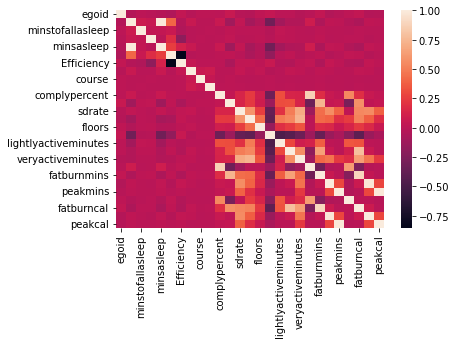

In [23]:
sns.heatmap(activity_sleep_grade.corr())

0.018653190845564604


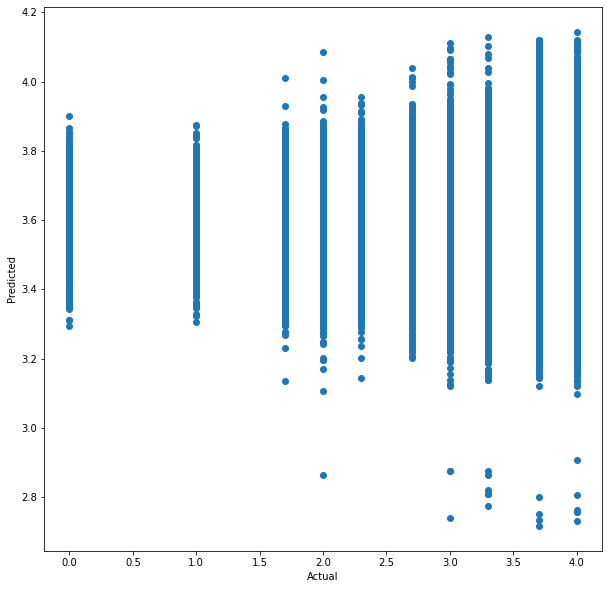

In [6]:
temp = activity_sleep_grade.fillna(0)

x = temp.drop(['grade', 'dataDate', 'timeoutofbed', 'timetobed', 'minsawake', 'lowrangecal', 'fatburncal', 'cardiocal', 'peakcal', 'datadate'], axis=1).values
y = temp['grade'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

ZeroDivisionError: float division by zero

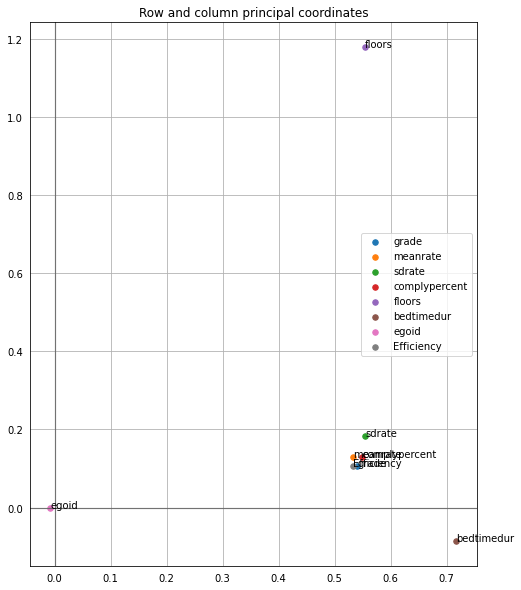

In [7]:
temp = activity_sleep_grade[['grade', 'meanrate', 'sdrate', 'complypercent','floors', 'bedtimedur', 'egoid', 'Efficiency']]
# temp = activity_grade
# temp = temp.fillna(0)
temp = temp.dropna()
temp = temp.loc[(temp!=0).any(axis=1)]
# for col in temp.columns:
#     temp = temp.loc[temp[col] > 0]

prince_mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
sleep_grade_mca = prince_mca.fit(temp)

ax = sleep_grade_mca.plot_coordinates(
        X=temp,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))